In [24]:
%load_ext autoreload
%autoreload 2

import cv2, os, sys
from datasets import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
dset = Tissue()

 [*] tissue_sick: 2162 unique cases (2162 total)
 [*] tissue_healthy: 2951 unique cases (278564 total)
 [*] tissue_sick: 1650 / 512
 [*] tissue_healthy: 229652 / 48912


In [27]:
bsize = 32
sickgen = dset.gen(bsize=bsize, labels=['lbls', 'masks', 'refs'], sickonly=True)
import matplotlib.pyplot as plt

with open('html/tissue/index.html', 'w') as fl:
    for bii in range(dset.train_size // bsize):
        sys.stdout.write('%d/%d    \r' % (bii+1, dset.train_size // bsize))
        sys.stdout.flush()
        
        imgs, masks, lbls, refs = next(sickgen)
        for ii in range(bsize):
            ind = bii*bsize + ii
            
            plt.figure(figsize=(7, 5))
            plt.subplot(1, 2, 1)
            plt.axis('off')
            plt.imshow(imgs[ii, :, :, 0])
            plt.subplot(1, 2, 2)
            plt.axis('off')
            plt.imshow(imgs[ii, :, :, 0])
            plt.imshow(masks[ii, :, :, 0], alpha=0.5, vmin=0, vmax=1)
            plt.savefig('html/tissue/%d.jpg' % ind, bbox_inches='tight')
#             plt.show()
            plt.close()
            
#             break
#         break
            
            fl.write('<div style="float:left;">\
<div>%s</div>\
<img src="./%d.jpg">\
</div>\n' % (refs[ii].split('/')[-1], ind))
        
#     fl.write('')
    

In [13]:
from utils import *

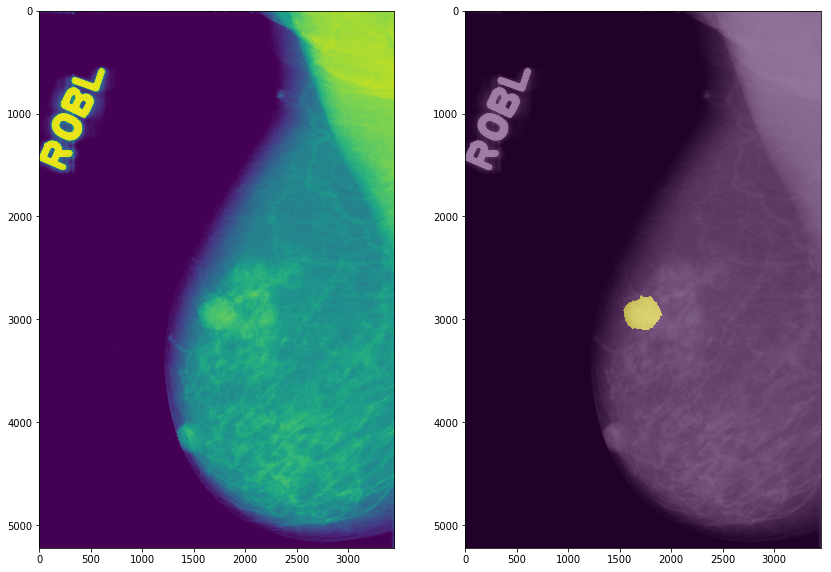

In [14]:
_ = plot_raw('02079_RIGHT_MLO')

255


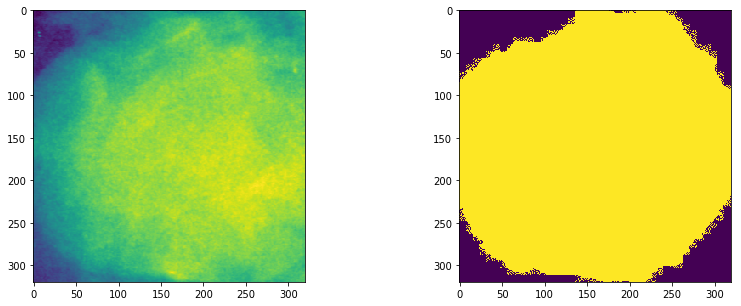

In [23]:
mask = cv2.imread('../datasets/tissue/cancers/02079_RIGHT_MLO.jpg', 0)
tissue = np.load('../datasets/tissue/cancers/02079_RIGHT_MLO.npy')
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(tissue)
plt.subplot(1, 2, 2)
print(np.max(mask))
plt.imshow(mask, vmin=0, vmax=1)
plt.show()
plt.close()